In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator #Newton
from scipy.interpolate import CubicHermiteSpline
from sympy.parsing.sympy_parser import parse_expr

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



## Derivada de Cinco Puntos:

In [ ]:
def five_point_derivative(f,x,h):
    n = len(x)
    derivada = np.zeros(len(x))

    for i in range(n):
        if i == 0:
            derivada[i] = (-25*f(x[i]) + 48*f(x[i]+h) - 36*f(x[i]+2*h) + 16*f(x[i]+3*h) - 3*f(x[i]+4*h))/(12*h)
        elif i == n-1:
            derivada[i] = (25*f(x[i]) - 48*f(x[i]-h) + 36*f(x[i]-2*h) - 16*f(x[i]-3*h) + 3*f(x[i]-4*h))/(12*h)
        else:
            derivada[i] = (f(x[i]-2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) - f(x[i]+2*h))/(12*h)
    return derivada

## Derviando $cos(x)$:

In [ ]:
x = np.linspace(0,2*np.pi, 10)
x2 = np.linspace(0,2*np.pi,100)
h = 0.005

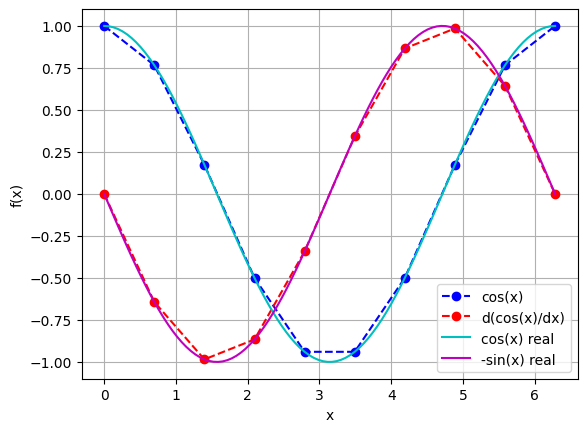

In [ ]:
y = lambda x: np.cos(x)
f_prime = five_point_derivative(y, x, h)

plt.plot(x, np.cos(x), 'bo--', label='cos(x)')
plt.plot(x, f_prime, 'ro--', label='d(cos(x)/dx)')
plt.plot(x2, np.cos(x2), 'c-', label='cos(x) real')
plt.plot(x2, -np.sin(x2), 'm-', label='-sin(x) real')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Interpolando $cos(x)$:

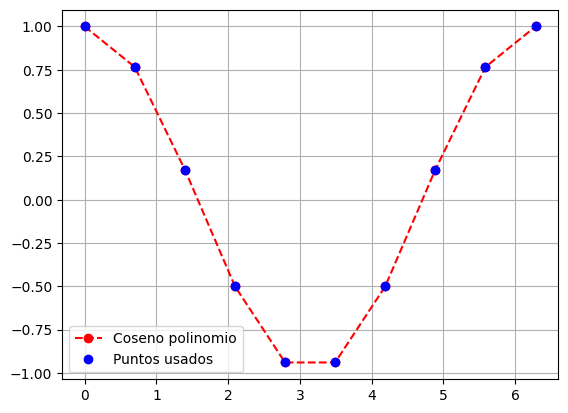

In [ ]:
pol_cos = CubicHermiteSpline(x, np.cos(x), f_prime)

plt.plot(x, pol_cos(x), 'ro--', label='Coseno polinomio')
plt.plot(x, np.cos(x), 'bo', label='Puntos usados')
plt.legend()
plt.grid()
plt.show()

**Primera derivada del coseno:**
$$ \frac{d(cos(x))}{dx} = -sin(x)

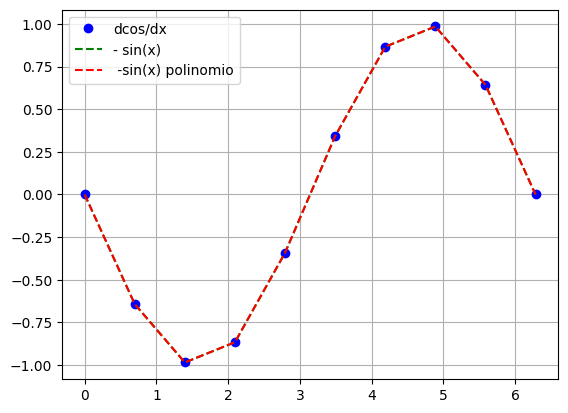

In [ ]:
dcos = five_point_derivative(pol_cos, x, h)
dcos_pol = BarycentricInterpolator(x, dcos)

plt.plot(x, dcos, 'bo', label='dcos/dx')
plt.plot(x, -np.sin(x), 'g--', label='- sin(x)')
plt.plot(x, dcos_pol(x), 'r--', label=' -sin(x) polinomio')
plt.legend()
plt.grid()
plt.show()

**Segunda derivada del coseno**
$$\frac{d^{2}}{dx}cos(x) = -cos(x)$$

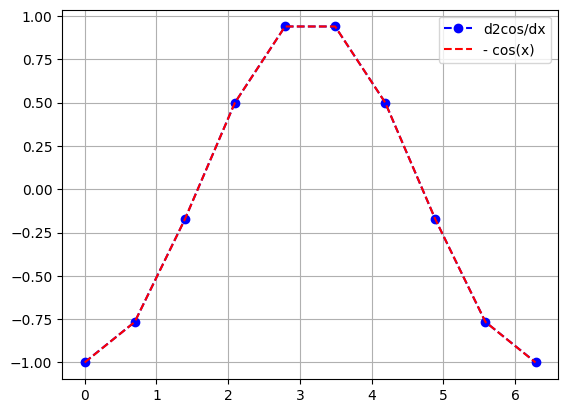

In [ ]:
d2cos = five_point_derivative(dcos_pol, x, h)
d2cos_pol = BarycentricInterpolator(x, d2cos)

plt.plot(x, d2cos, 'bo--', label='d2cos/dx')
plt.plot(x, -np.cos(x), 'r--', label='- cos(x)')
plt.legend()
plt.grid()
plt.show()

## Cálculo de errores:

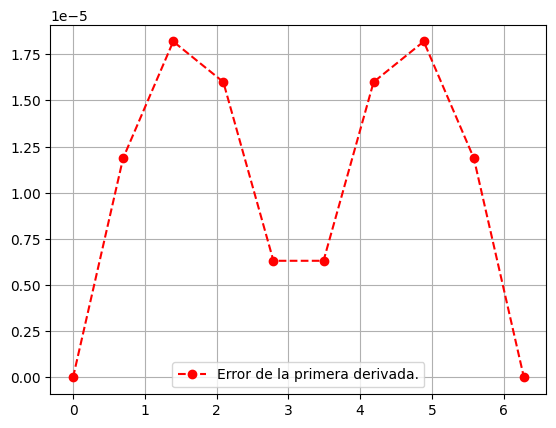

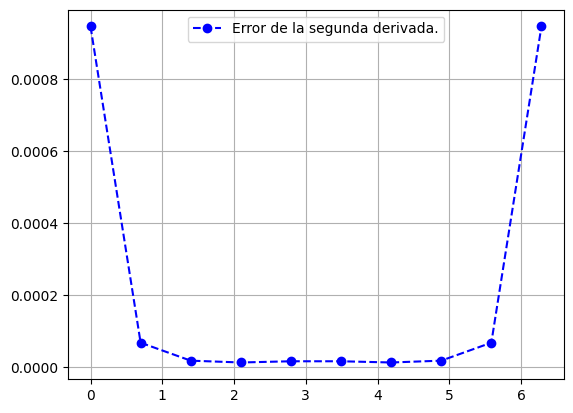

In [ ]:
error1 = np.abs(dcos_pol(x) - (-np.sin(x)))
error2 = np.abs(d2cos_pol(x) - (-np.cos(x)))

plt.plot(x, error1, 'ro--', label='Error de la primera derivada.')
plt.legend()
plt.grid()
plt.show()

plt.plot(x, error2, 'bo--', label='Error de la segunda derivada.')
plt.legend()
plt.grid()
plt.show()

## Valor para $f''(\pi/8)$:

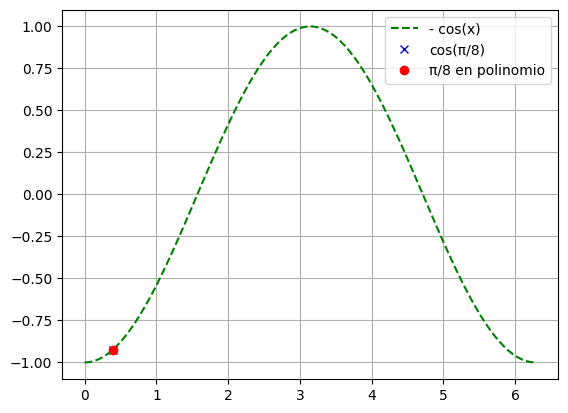

Valor real: 0.9238795325112867
Valor interpolado: -0.9240560308972529


In [ ]:
plt.plot(x2, -np.cos(x2), 'g--', label='- cos(x)')
plt.plot(np.pi/8, -np.cos(np.pi/8), 'bx', label='cos(π/8)')
plt.plot(np.pi/8, d2cos_pol(np.pi/8), 'ro', label='π/8 en polinomio')
plt.legend()
plt.grid()
plt.show()

print(f'Valor real: {np.cos(np.pi/8)}')
print(f'Valor interpolado: {d2cos_pol(np.pi/8)}')

# 2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

## Calculando las derivadas:

In [ ]:
x = sp.symbols('x')
f = x*sp.exp(x)
f_prime = sp.diff(f,x)
f_prime2 = sp.diff(f,x,2)

domain = np.linspace(1.8, 2.2, 6)
domain_continuo = np.linspace(1.8, 2.2, 100)

In [ ]:
fl = sp.lambdify(x,f)
f_primel = sp.lambdify(x,f_prime)
f_primel2 = sp.lambdify(x,f_prime2)

In [ ]:
def forward_diff(f,x,h):
  return (f(x+h)-f(x))/h

def backward_diff(f,x,h):
  return (f(x)-f(x-h))/h

def centered_diff(f,x,h):
  return (f(x+h)-f(x-h))/(2*h)

### **Primera derivada por diferencias finitias:**

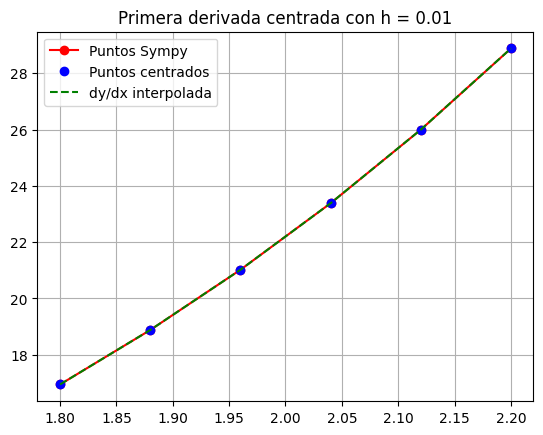

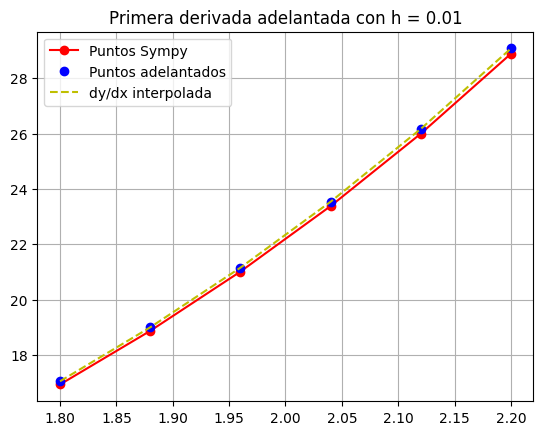

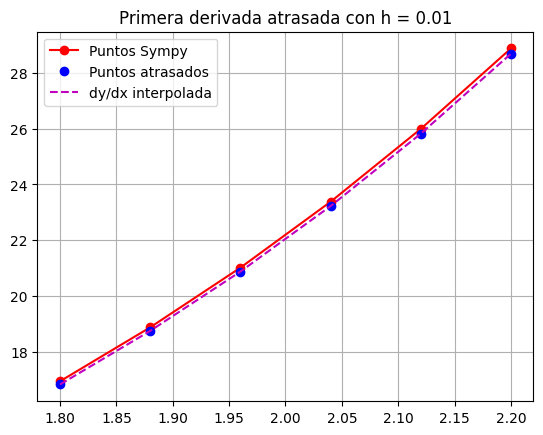

In [ ]:
h = 0.01
derivada1 = centered_diff(fl,domain,h)
derivada1_adelante = forward_diff(fl, domain, h)
derivada1_atras = backward_diff(fl, domain, h)
pol_derivada1 = BarycentricInterpolator(domain,derivada1)
pol_derivada1_adelante = BarycentricInterpolator(domain, derivada1_adelante)
pol_derivada1_atras = BarycentricInterpolator(domain, derivada1_atras)

plt.plot(domain, f_primel(domain), 'ro-', label='Puntos Sympy')
plt.plot(domain, derivada1, 'bo', label='Puntos centrados')
plt.plot(domain, pol_derivada1(domain), 'g--', label='dy/dx interpolada')
plt.title(f'Primera derivada centrada con h = {h}')
plt.legend()
plt.grid()
plt.show()

plt.plot(domain, f_primel(domain), 'ro-', label='Puntos Sympy')
plt.plot(domain, derivada1_adelante, 'bo', label='Puntos adelantados')
plt.plot(domain, pol_derivada1_adelante(domain), 'y--', label='dy/dx interpolada')
plt.title(f'Primera derivada adelantada con h = {h}')
plt.legend()
plt.grid()
plt.show()

plt.plot(domain, f_primel(domain), 'ro-', label='Puntos Sympy')
plt.plot(domain, derivada1_atras, 'bo', label='Puntos atrasados')
plt.plot(domain, pol_derivada1_atras(domain), 'm--', label='dy/dx interpolada')
plt.title(f'Primera derivada atrasada con h = {h}')
plt.legend()
plt.grid()
plt.show()

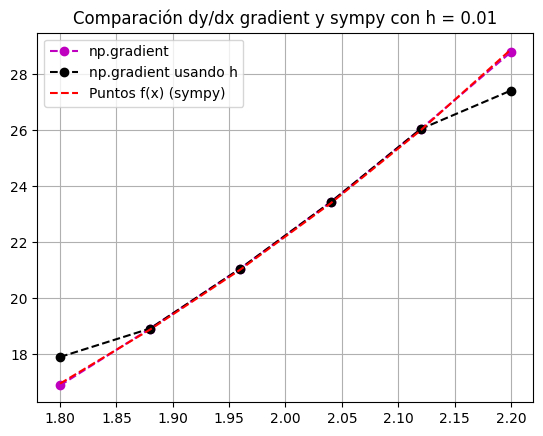

In [ ]:
numpy_derivada1 = np.gradient(fl(domain), domain, edge_order=2)
np_derivada1 = np.gradient(fl(domain), 0.08)

plt.plot(domain, numpy_derivada1, 'mo--', label='np.gradient')
plt.plot(domain, np_derivada1, 'ko--', label='np.gradient usando h')
plt.plot(domain, f_primel(domain), 'r--', label='Puntos f(x) (sympy)')
plt.title(f'Comparación dy/dx gradient y sympy con h = {h}')
plt.legend()
plt.grid()
plt.show()

### **Segunda derivada por diferencias finitas:**

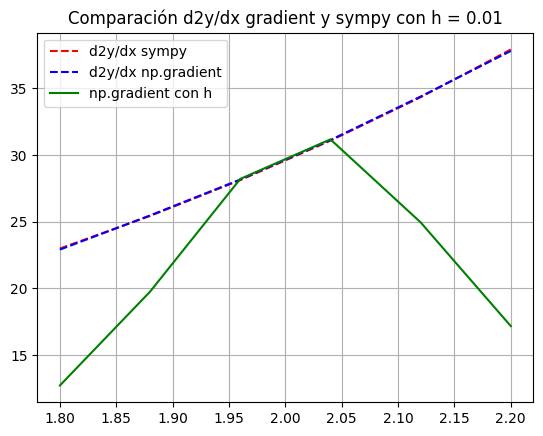

In [ ]:
derivada2 = centered_diff(f_primel,domain,h)
numpy_derivada2 = np.gradient(f_primel(domain), domain, edge_order=2)
np_derivada2 = np.gradient(np_derivada1, 0.08)
pol_derivada2 = BarycentricInterpolator(domain, derivada2)

plt.plot(domain, derivada2, 'r--', label='d2y/dx sympy')
plt.plot(domain, numpy_derivada2, 'b--', label='d2y/dx np.gradient')
plt.plot(domain, np_derivada2, 'g-', label='np.gradient con h')
plt.title(f'Comparación d2y/dx gradient y sympy con h = {h}')
plt.legend()
plt.grid()
plt.show()

## Calculando el valor de $f'(x)$ y $f''(x)$ para $x=2$:

In [ ]:
print(f'Valor de f´(2) = {pol_derivada1(2)} por polinomio interpolador.')
print(f'Valor de f´´(2) = {pol_derivada2(2)} por polinomio interpolador.')
print(f'Valor real f´(x) = {f_primel(2)}')
print(f'Valor real f´´(x) = {f_primel2(2)}')

Valor de f´(2) = 22.199597060707127 por polinomio interpolador.
Valor de f´´(2) = 29.556963400953695 por polinomio interpolador.
Valor real f´(x) = 22.16716829679195
Valor real f´´(x) = 29.5562243957226


## Método para calcular todas las derivadas:

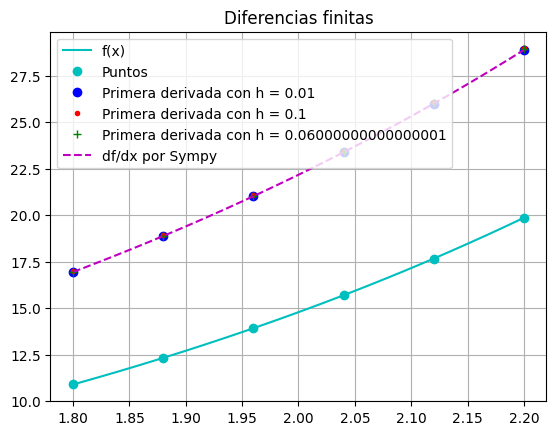

In [ ]:
h = np.linspace(0.01, 0.1, 10)
derivadas1 = []
for i in range(len(h)):
    u = centered_diff(fl, domain, h[i])
    derivadas1.append(u)
derivadas1 = np.array(derivadas1)

#pol_derivadas1 = np.zeros(len(derivadas1))
#or j in range(len(derivadas1)):
    #pol_derivadas1[j] = BarycentricInterpolator(domain, derivadas1[j])

pos = 5
plt.plot(domain_continuo, fl(domain_continuo), 'c-', label='f(x)')
plt.plot(domain, fl(domain), 'co', label='Puntos')
plt.plot(domain, derivadas1[0], 'bo', label=f'Primera derivada con h = {h[0]}')
plt.plot(domain, derivadas1[9], 'r.', label=f'Primera derivada con h = {h[9]}')
plt.plot(domain, derivadas1[pos], 'g+', label=f'Primera derivada con h = {h[pos]}')
plt.plot(domain_continuo, f_primel(domain_continuo), 'm--', label='df/dx por Sympy')
plt.title('Diferencias finitas')
plt.legend()
plt.grid()
plt.show()

[10.88936544 12.32058914 13.91468105 15.68884277 17.66201147 19.8550297 ]


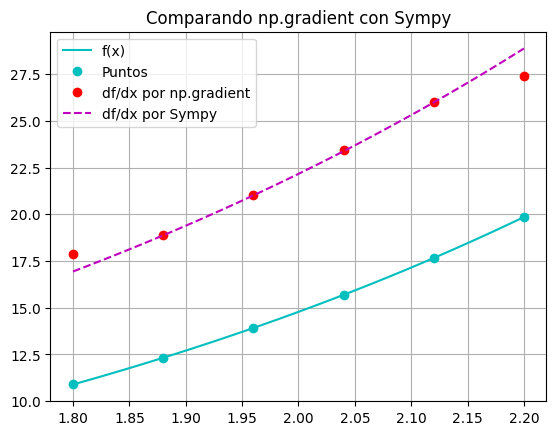

In [ ]:
y = fl(domain)
print(y)
numpy_derivada1 = np.gradient(fl(domain), 0.08)

plt.plot(domain_continuo, fl(domain_continuo), 'c-', label='f(x)')
plt.plot(domain, fl(domain), 'co', label='Puntos')
plt.plot(domain, numpy_derivada1, 'ro', label='df/dx por np.gradient')
plt.plot(domain_continuo, f_primel(domain_continuo), 'm--', label='df/dx por Sympy')
plt.title('Comparando np.gradient con Sympy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
np_derivada1 = np.gradient(fl(domain), domain, edge_order=2)

#plt.plot(domain, np.derivada1, 'ro', label='')

AttributeError: module 'numpy' has no attribute 'derivada1'

# 3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [ ]:
def tres_puntos(f, x, h):
    n = len(x)
    derivative = np.zeros(len(x))
    for i in range(n):
        if i == 0:
            derivative[i] = (-3*f(x[i]) + 4*f(x[i]+h) - f(x[i]+2*h))/(2*h)
        elif i == n-1:
            derivative[i] = (3*f(x[i]) - 4*f(x[i]-h) + f(x[i]-2*h))/(2*h)
        else:
            derivative[i] = (f(x[i]+h) - f(x[i]-h))/(2*h)
    return derivative

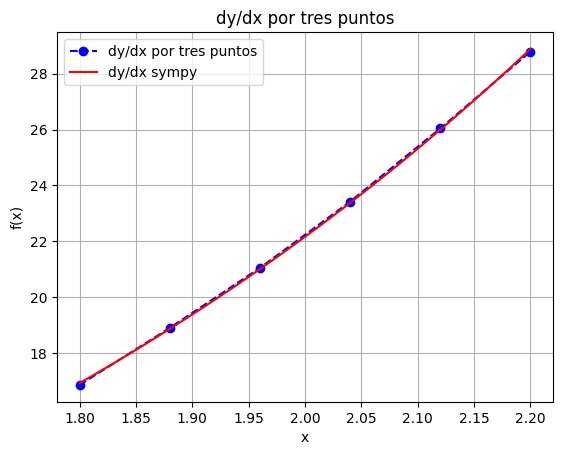

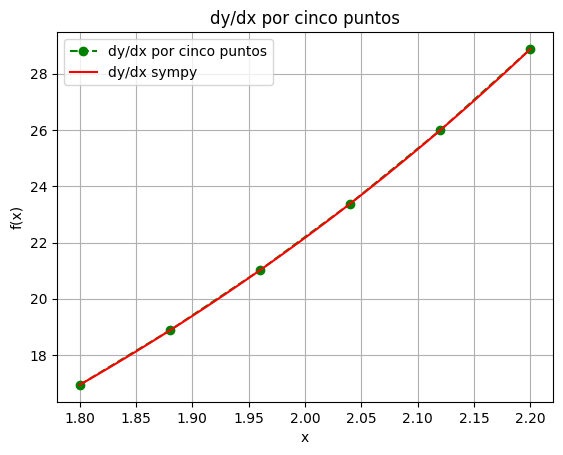

In [ ]:
h = 0.08
df3 = tres_puntos(fl, domain, h)
df5 = five_point_derivative(fl, domain, h)

plt.plot(domain, df3, 'bo--', label='dy/dx por tres puntos')
plt.plot(domain_continuo, f_primel(domain_continuo), 'r-', label='dy/dx sympy')
plt.title('dy/dx por tres puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(domain, df5, 'go--', label='dy/dx por cinco puntos')
plt.plot(domain_continuo, f_primel(domain_continuo), 'r-', label='dy/dx sympy')
plt.title('dy/dx por cinco puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

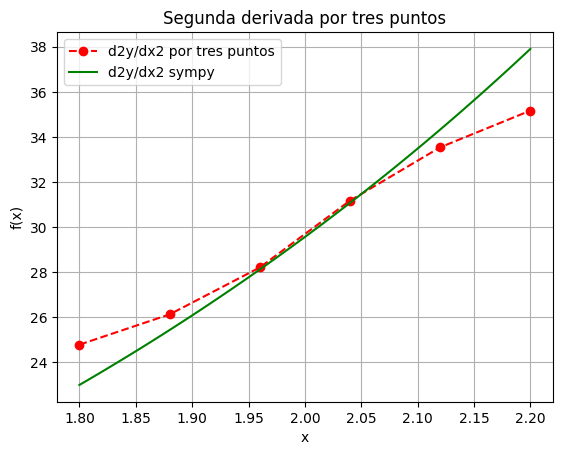

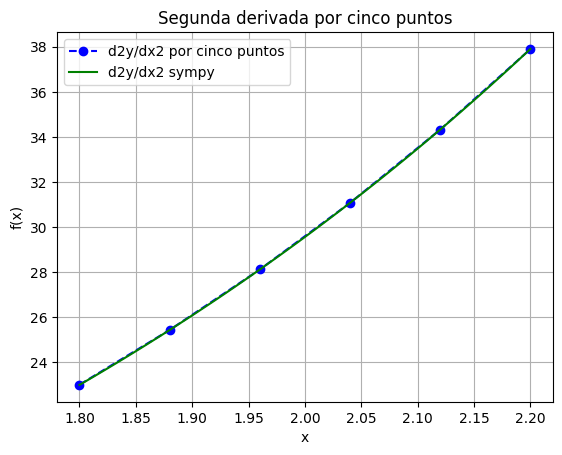

In [ ]:
df3_pol = BarycentricInterpolator(domain, df3)
df5_pol = BarycentricInterpolator(domain, df5)

d2f3 = tres_puntos(df3_pol, domain, h)
d2f5 = five_point_derivative(df5_pol, domain, h)

plt.plot(domain, d2f3, 'ro--', label='d2y/dx2 por tres puntos')
plt.plot(domain_continuo, f_primel2(domain_continuo), 'g-', label='d2y/dx2 sympy')
plt.title('Segunda derivada por tres puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(domain, d2f5, 'bo--', label='d2y/dx2 por cinco puntos')
plt.plot(domain_continuo, f_primel2(domain_continuo), 'g-', label='d2y/dx2 sympy')
plt.title('Segunda derivada por cinco puntos')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()